# <center> Classifying flowers

We'll **classify** flowers of the Iris species. The Iris dataset was first used by R. Fisher in his paper [*The use of multiple measurements in taxonomic problems*](http://www.comp.tmu.ac.jp/morbier/R/Fisher-1936-Ann._Eugen.pdf).

The dataset includes flowers of 3 sub-species of Iris, and the features used to discriminate them are: 

* the length of the sepal (in cm)
* the width of the sepal (in cm)
* the length of the petal (in cm)
* the length of the petal (in cm)

<img src=img/iris-setosa.jpg width="200" align="left"> **Iris Setosa**

Image Credit: <a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Link</a>

<img src=img/iris-versicolor.jpg width="200" align="left"> **Iris Versicolor**

Image By <a href="//commons.wikimedia.org/wiki/User:Dger" title="User:Dger">D. Gordon E. Robertson</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=10227368">Link</a>

<img src=img/iris-virginica.jpg width="200" align="left"> **Iris Virginica**

Image By <a rel="nofollow" class="external text" href="http://flickr.com/photos/33397993@N05">Frank Mayfield</a> - originally posted to <a href="//commons.wikimedia.org/wiki/Flickr" class="mw-redirect" title="Flickr">Flickr</a> as <a rel="nofollow" class="external text" href="http://flickr.com/photos/33397993@N05/3352169862">Iris virginica shrevei BLUE FLAG</a>, <a href="http://creativecommons.org/licenses/by-sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=9805580">Link</a>

#### Imports and settings

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import itertools

%matplotlib inline

data_folder = 'datasets/'

filename = data_folder + 'iris.csv'

### Read and analyse dataset

#### Read file into Pandas DataFrame

In [5]:
df = pd.read_csv(filename)

#### See what's inside

In [17]:
df.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.describe()    # only considers numerical columns

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Histogram the data

[]

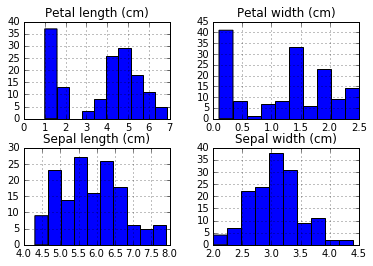

In [25]:
df.hist()
plt.plot()

#### Isolate X and y

In [26]:
X = df[['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']]
y = df['Class']

#### Shape and dim of X and Y

In [15]:
X.shape
y.shape

(150,)

### Classify

#### Train a classifier

We initially choose a Decision Tree classifier. Then we will try a Random Forest.

In [27]:
# Initiate the model

model = DecisionTreeClassifier()
#model = RandomForestClassifier()

#### Train model and classify new data point

In [40]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
new_data = [5.5, 4, 2.5, 1]

print model.predict(new_data)[0]

Iris-versicolor


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Performance

In [58]:
# Separate train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Shape of the two sets

In [59]:
X_test.shape

(30, 4)

In [64]:
# Re-instantiate model, fit on train, predict on test, see performance

model = DecisionTreeClassifier()
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Classification Report & Confusion matrix

In [65]:
print classification_report(y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30



In [66]:
# Method to plot a confusion matrix and overlay numbers
def do_plot_conf_mat(targets_true, 
                     targets_pred,
                     labels=None,
                     normalize=False,
                     cmap=plt.cm.Blues):
    """
    Compute the confusion matrix of a classifier and plot it with overlayed numbers on each cell.
    Conf Mat will have the real targets on the rows and the predicted targets on the columns.
    INPUT:
        - the list of real targets for samples
        - the list of predictes samples for samples
        - the list of labels to be plotted in that order on the cells rows/colums
            * defaults to None, which will put cells in the sorted order of all targets found 
              (all available classes will be used)
            * if list is given, this will automatically adjust cell values to those order 
              because this is what confusion_matrix does automatically.
              In this case, you can pass a list containing only the classes of your interest for the matrix.
        - boolean about whether to normalize matrix (by row) or not (default:False)
        - the map of gradient colours to apply
    OUTPUT:
        - the conf matrix
    NOTEs: 
        * overlayed numbers in the normalised case are printed with 2 decimal digits
        * gradient colourbar on the side will always report non-normalised values
        * If normalised, the diagonal of the conf mat will give the rate of correctly classified samples in each class
    """
    
    # Compute the confusion matrix
    cm = confusion_matrix(targets_true, targets_pred, labels=labels)
    
    # Set the title
    title = 'Confusion Matrix'

    if not labels:
        labels = sorted(list(set(targets_true) & set(targets_pred)))
            
    # Set plotting parameters
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title += ', normalized (by row)'
        
    # this is for overlaying the numbers on cells
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    
    plt.show()
    
    return cm

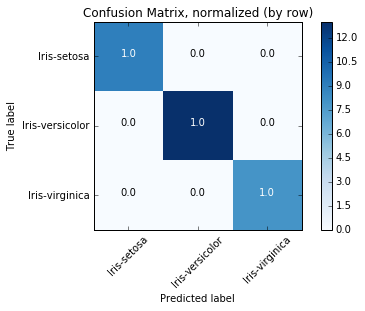

In [67]:
cm = do_plot_conf_mat(y_test, y_pred, normalize=True, labels=None)

### References

* [The original paper on DT, with the weather example](http://hunch.net/~coms-4771/quinlan.pdf)
* [scikit-learn docs on DT](http://scikit-learn.org/stable/modules/tree.html)
* [scikit-learn on RF](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Theory: a great (free) book on ML](https://statweb.stanford.edu/~tibs/ElemStatLearn/)
* [Iris dataset source at the University of California @Irvine ML repository](https://archive.ics.uci.edu/ml/datasets/Iris)